# Activity Tutorial

This Jupyter notebook is designed to deepen your understanding of mixing behaviors in solutions, focusing on both theoretical models and practical applications. We will explore ideal and non-ideal mixing rules, differentiate between mass-based and molar-based approaches, and introduce the kappa value parameterization for predicting water activity.

## Introduction to Mixing Rules

Mixing rules are essential for predicting the properties of solutions, including their thermodynamic behavior and phase equilibria. In this notebook, we will:

- **Define and compare different mixing rules:** Understand how various rules apply to different types of solutions.
- **Mass-Based vs. Molar-Based Mixing:** Discuss the implications of choosing mass-based or molar-based calculations for different applications.
- **Kappa Value based Activity:** Learn about the kappa value parameterization and its role in modeling water activity in non-ideal solutions.

## Structure of the Notebook

1. **Mass-Based vs. Molar-Based Mixing**
   - Definitions and when to use each method
   - Examples and comparative analysis

2. **Kappa Value Parameterization**
   - Theory behind kappa values
   - Practical exercises on calculating water activity

## Strategies, Builders, and Factories

We'll show examples for getting the strategy directly, form a builder, and from a factory.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import particula as par

## Strategy: Ideal Activity Mass-Based Mixing

The ideal in this context refers to all the activity coefficients being equal to 1. This is the simplest case and is often used as a reference point for more complex models. In this case, then we are just mixing based on mass fractions in the solution. Let's start witha mixture of water and sucrose.

With an Ideal mass based mixing rule, the activity and partial pressure reduction is just the mass fraction of the component in the mixture.


In [2]:
activity_mass = par.particles.ActivityIdealMass()  # no parameters needed

# mixture
mass_mixture = np.array([0.2, 0.8])  # water, sucrose

activities = activity_mass.activity(mass_concentration=mass_mixture)
print(f"Activities: {activities}")

# partial pressures
pure_pressure = np.array([100, 10])  # water, sucrose
partial_pressures = activity_mass.partial_pressure(
    pure_vapor_pressure=pure_pressure, mass_concentration=mass_mixture
)

print(f"Partial pressures: {partial_pressures}")

Activities: [0.2 0.8]
Partial pressures: [20.  8.]


## Builder: Molar-Based Mixing

All strategies have a builder method that can be used to create a new strategy with different parameters. In this case, we will create a molar-based mixing rule using the builder method.

Using the same mixture of water and sucrose, we will now calculate the activity and partial pressure reduction based on molar fractions in the solution. We should see a large effect due to the difference in molecular weight between water and sucrose.

In [3]:
activity_molar = (
    par.particles.ActivityIdealMolarBuilder()
    .set_molar_mass(
        np.array([18.01528, 342.29648]) * 1e-3, "kg/mol"
    )  # water, sucrose
    .build()
)

# mixture
activities = activity_molar.activity(mass_concentration=mass_mixture)
print(f"Activities: {activities}")

# partial pressures
pure_pressure = np.array([100, 10])  # water, sucrose
partial_pressures = activity_molar.partial_pressure(
    pure_vapor_pressure=pure_pressure, mass_concentration=mass_mixture
)

print(f"Partial pressures: {partial_pressures}")

Activities: [0.82608954 0.17391046]
Partial pressures: [82.6089542   1.73910458]


## Factory: Kappa Value Parameterization

Lastly, we will use the factory method to create a kappa value parameterization for predicting water activity in non-ideal solutions. This method is more complex and requires additional parameters to be defined. We will use the same water-sucrose mixture to demonstrate the kappa value approach.

In [4]:
parameters_input = {
    "density": np.array(
        [1000, 1500]
    ),  # water, sucrose, kg/m^3 are the base SI default units
    "density_units": "kg/m^3",  # this tells the factory what the input units are so it can convert to kg/m^3
    "molar_mass": np.array([18.01528, 342.29648]),  # water, sucrose
    "molar_mass_units": "g/mol",  # this tells the factory what the input units are so it can convert to kg/mol
    "kappa": np.array([0, 0.3]),  # water, sucrose
    "water_index": 0,  # water is the first component
}

activity_kappa = par.particles.ActivityFactory().get_strategy(
    strategy_type="kappa", parameters=parameters_input
)

# mixture
activities = activity_kappa.activity(mass_concentration=mass_mixture)
print(f"Activities: {activities}")

# partial pressures
pure_pressure = np.array([100, 10])  # water, sucrose
partial_pressures = activity_kappa.partial_pressure(
    pure_vapor_pressure=pure_pressure, mass_concentration=mass_mixture
)

print(f"Partial pressures: {partial_pressures}")

Activities: [0.55555556 0.17391046]
Partial pressures: [55.55555556  1.73910458]


## Plotting Mixing Rules

We will plot the activity and partial pressure reduction for the water-sucrose mixture using the ideal mass-based mixing rule, molar-based mixing rule, and kappa value parameterization. This will help us visualize the differences between the three methods and understand how they affect the prediction of water activity in the solution.

Note: Only water is treated non-ideally in the kappa value parameterization. The other species are treated in a molar-based ideal mixing rule.

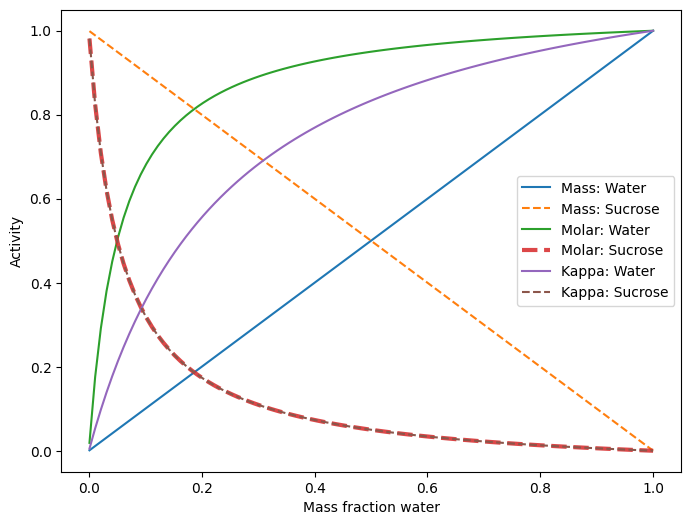

In [5]:
mass_water = np.linspace(0.001, 0.9999, 100)
mass_sucrose = 1 - mass_water
mass_mixture = np.array([mass_water, mass_sucrose]).T

activities_mass = np.zeros_like(mass_mixture)
activities_molar = np.zeros_like(mass_mixture)
activities_kappa = np.zeros_like(mass_mixture)


for i, mass in enumerate(mass_mixture):
    activities_mass[i] = activity_mass.activity(mass_concentration=mass)
    activities_molar[i] = activity_molar.activity(mass_concentration=mass)
    activities_kappa[i] = activity_kappa.activity(mass_concentration=mass)

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(mass_water, activities_mass[:, 0], label="Mass: Water")
ax.plot(
    mass_water, activities_mass[:, 1], label="Mass: Sucrose", linestyle="--"
)
ax.plot(mass_water, activities_molar[:, 0], label="Molar: Water")
ax.plot(
    mass_water,
    activities_molar[:, 1],
    label="Molar: Sucrose",
    linestyle="--",
    linewidth=3,
    alpha=0.85,
)
ax.plot(mass_water, activities_kappa[:, 0], label="Kappa: Water")
ax.plot(
    mass_water, activities_kappa[:, 1], label="Kappa: Sucrose", linestyle="--"
)
ax.set_xlabel("Mass fraction water")
ax.set_ylabel("Activity")
ax.legend()
plt.show()

## Summary

By the end of this notebook, you should have a better understanding of mixing rules, mass-based vs. molar-based calculations, and the kappa value parameterization for predicting water activity in non-ideal solutions. You will also have learned how to apply these concepts to practical examples and visualize the results using plots.

You saw how different mixing rules can be used to predict the properties of solutions and how they can affect the accuracy of the predictions. You also learned about the kappa value parameterization and how it can be used to model water activity in non-ideal solutions. These concepts are essential for condensation and phase equilibrium calculations when aerosol particles are present in the atmosphere.